In [7]:
cd ../src

/home/luka/Dropbox/msc_icl/541_Individual_Project/src


In [11]:
import matplotlib
import matplotlib.pylab as plt
%matplotlib inline
import sys,os
sys.path.append('../src')
from pyexp import PyExp


def load_disfa(preprocessing,
               quick=False,
               scaling=None,
               quiet=True):
    print 'Working....'
    if quiet:
        # REDIRECT STDOUT ###################
        tmp = sys.stdout                    #
        sys.stdout = open(os.devnull,"w")   #
        #####################################
    config = PyExp(config_file='config/test.yaml', path='/tmp', config_overwrite=None)

    import disfa
    reload(disfa)
    if quick:
        config.config['data']['train_subjects'] = [6,10]
        config.config['data']['validation_subjects'] = [2]
        config.config['data']['test_subjects'] = [2]
    config.config['data']['full']['resize_scale'] = 0.4
    
    print config.config['data']['preprocessing']
    config.config['data']['preprocessing'] = preprocessing
    print config.config['data']['preprocessing']
    data = disfa.Disfa(config['data'],debug=True)
    if quiet:
        # UNDO STDOUT REDIRECT ##############
        sys.stdout = tmp                    #
        #####################################
    print 'Done.'
    return data

import helper
helper = reload(helper)

    
def show_batch_faces(batch,preprocessing,inverse=False,save=None):
    images = []
    names = []
    if inverse:
        batch.images = batch.inverse_process(batch.images)
    images.append(batch.images[0,:,:])
    names.append('a face')
    images.append(batch.images.min(axis=0))
    names.append('minimum face')
    images.append(batch.images.max(axis=0))
    names.append('maximum face')
    images.append(batch.images.mean(axis=0))
    names.append('mean face')
    images.append(batch.images.std(axis=0))
    names.append('stdev face')
    if preprocessing['range']:
        if preprocessing['per_subject']:
            images.append(batch.min[0])
        else:
            images.append(batch.min)
        names.append('minimum '+str(0))
    
    if batch.images.min() > -2.0 and batch.images.max() < 2.0:
        r = (batch.images.min(),batch.images.max())
    else:
        r = None
    helper.plot_images(images,names,title=None,save=save,range=r)
    
#     names = []; images = []
#     if preprocessing['face']:
#         if preprocessing['per_subject']:
#             for i in xrange(batch.mean.shape[0]):
#                 images.append(batch.mean[i])
#                 names.append(str(i))
                
#     helper.plot_images(images,names,title=None,save=save)
    
    
    
def dataset_stats(preprocessing,
                  scaling=None,
                  quick=True,
                  quiet=True):
    
    data = load_disfa(preprocessing,
                      scaling=scaling,
                      quick=quick,
                      quiet=quiet)
    
    print data.config['preprocessing']
    if not quiet:
        print data.train.images.shape
        print data.validation.images.shape
    if not quiet:
        print '\n\n\n'
    save = os.path.join(os.path.expanduser('~'),'Dropbox/msc_icl/541_Individual_Project/report_final/figures/')
    name = 'faces_'
    for key in preprocessing:
        if preprocessing[key]:
            name += key + '_'
        
    if len(name) > 0 and name[-1] == '_':
        name = name[:-1]
    
    save = os.path.join(save,str(name)+'.pdf')
    show_batch_faces(data.validation,preprocessing,save=save)
    show_batch_faces(data.validation,preprocessing,save=None,inverse=True)
    del data
    return

# def test_idx(normalisation_type=None,
#                   scaling=None,
#                   quick=True,
#                   quiet=False):
#     data = load_disfa(normalisation_type=normalisation_type,
#                       scaling=scaling,quick=quick,quiet=quiet)
#     print data.train.images.shape
#     i = []
#     N = 4
#     for j in xrange(N):
#         n = float(j)*float(data.validation.images.shape[0])/float(N)
#         i.append(int(n))
#     inp = data.validation.images[i,:,:]
#     out = data.validation.inverse_process(inp,idx=i)
# #     out = data.train.inverse_process(inp,idx=i)
    
#     images = []
#     names = []
#     for im in xrange(len(i)):
#         images.append(inp[im]); names.append(str(i[im]))
#         images.append(out[im]); names.append(str(i[im]))
#     plot_images(images,names,title=data.train.batch_type)

# test_idx(normalisation_type='none')
# test_idx(normalisation_type='face_ps')
# data = load_disfa(quick=True,quiet=True)
# print data.validation.subject_idx
# print data.validation.get_local_subject_id(data.validation.get_subject_id(0))
# print data.validation.get_local_subject_id(data.validation.get_subject_id(5000))
# print data.validation.get_local_subject_id(data.validation.get_subject_id(10000))

SyntaxError: invalid syntax (helper.py, line 28)

* contrast
* face
* [-1,1]
* per_subject

# None

Working....


Done.
{'range': False, 'per_subject': False, 'contrast': False, 'face': False}
save to /home/luka/Dropbox/msc_icl/541_Individual_Project/report_final/figures/faces.pdf


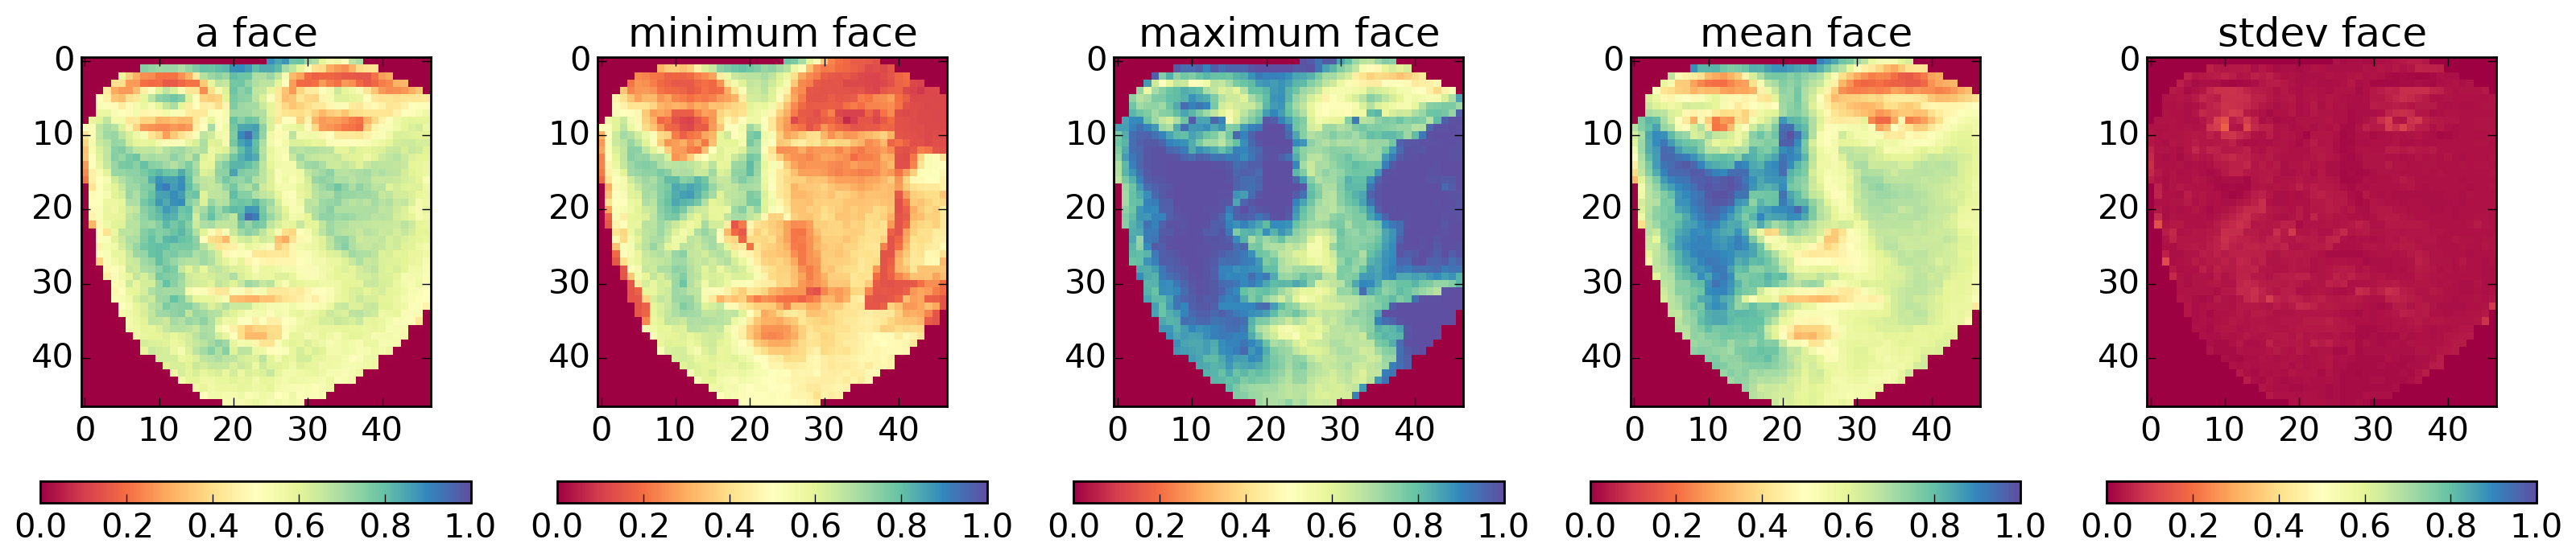

DEBUG:validation: not saving nothing for you mate


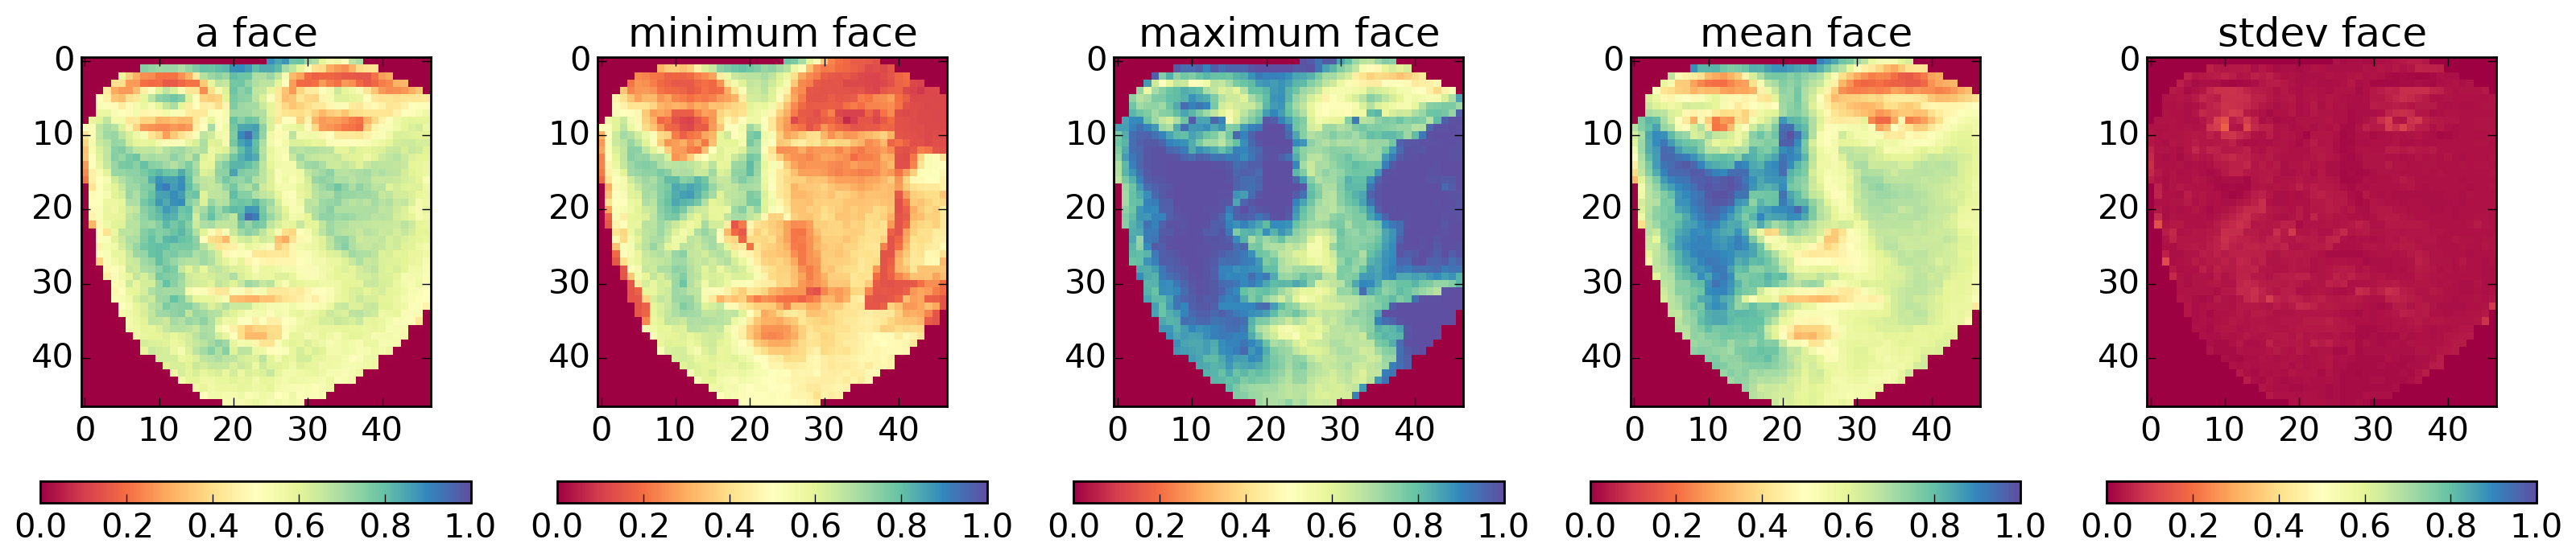

In [9]:
p = {'contrast':False,'face':False,'per_subject':False,'range':False}
dataset_stats(p)

# contrast, None

Working....


Done.
{'range': False, 'per_subject': False, 'contrast': True, 'face': False}
save to /home/luka/Dropbox/msc_icl/541_Individual_Project/report_final/figures/faces_contrast.pdf


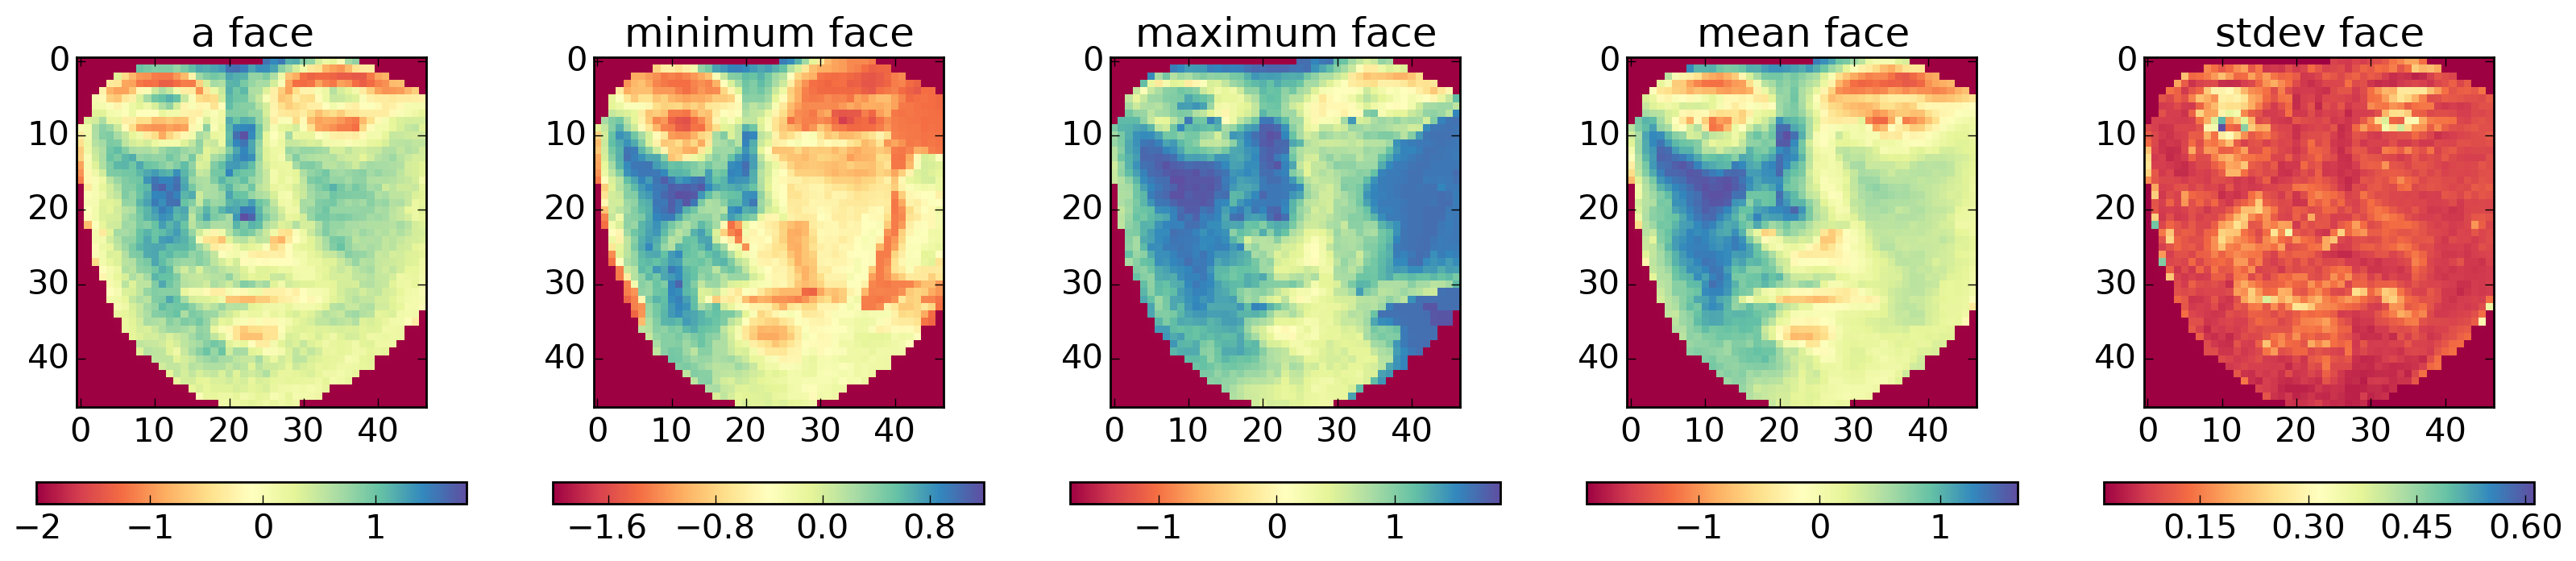

DEBUG:validation: not saving nothing for you mate


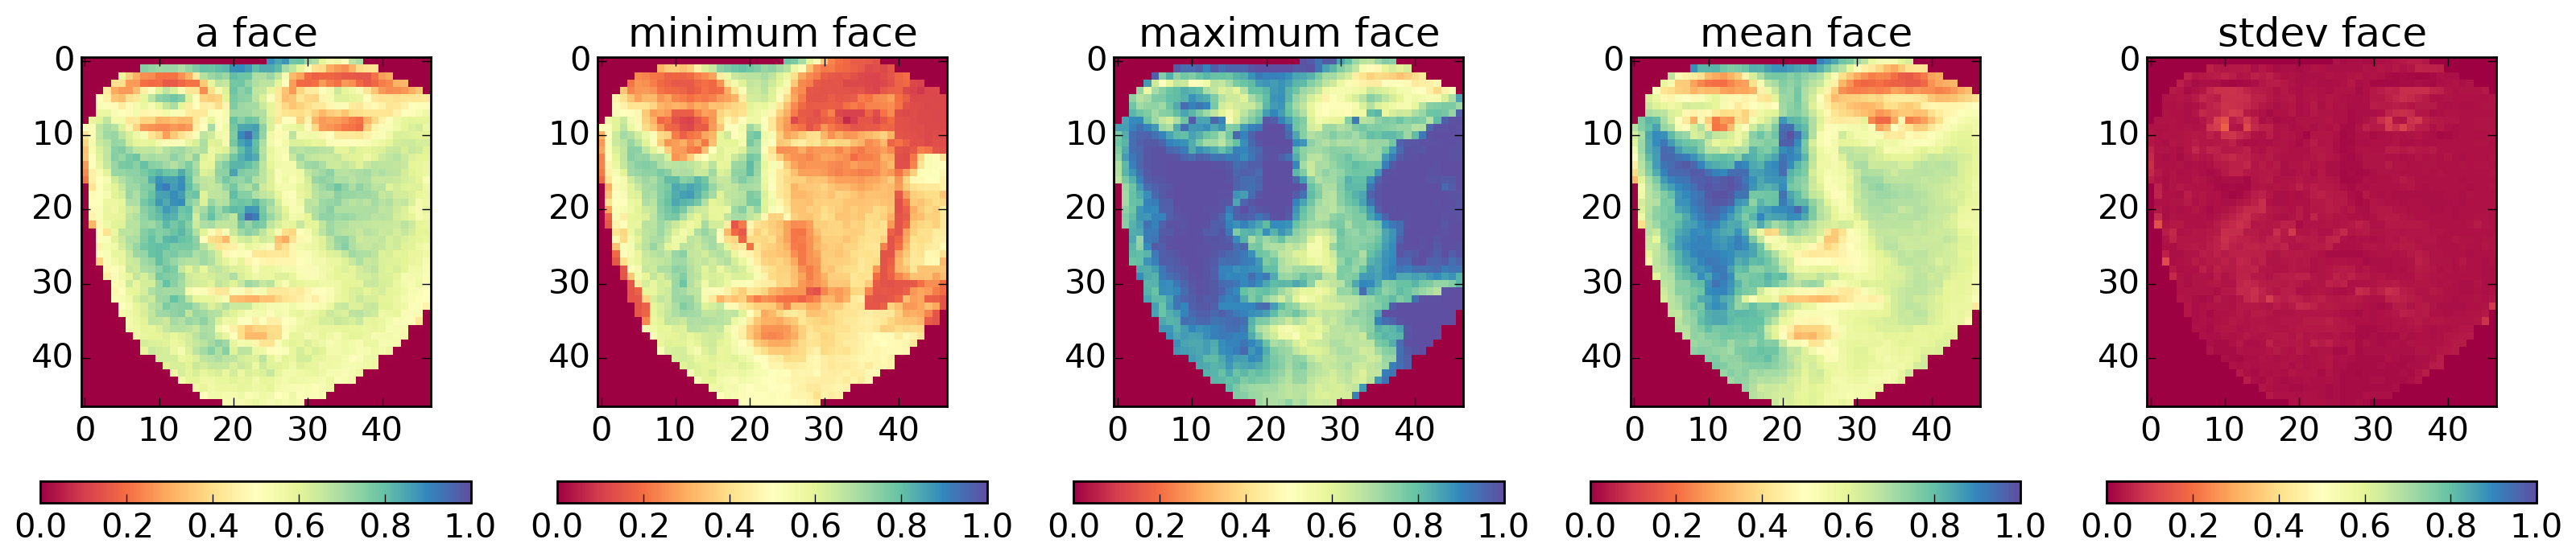

In [4]:
dataset_stats({'contrast':True,'face':False,'per_subject':False,'range':False})

# face, None

Working....


disfa.py:24: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if new_value == None:
disfa.py:347: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.mean == None and self.std == None:
disfa.py:328: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if mean == None and std == None:


Done.
{'range': False, 'per_subject': False, 'contrast': False, 'face': True}
save to /home/luka/Dropbox/msc_icl/541_Individual_Project/report_final/figures/faces_face.pdf


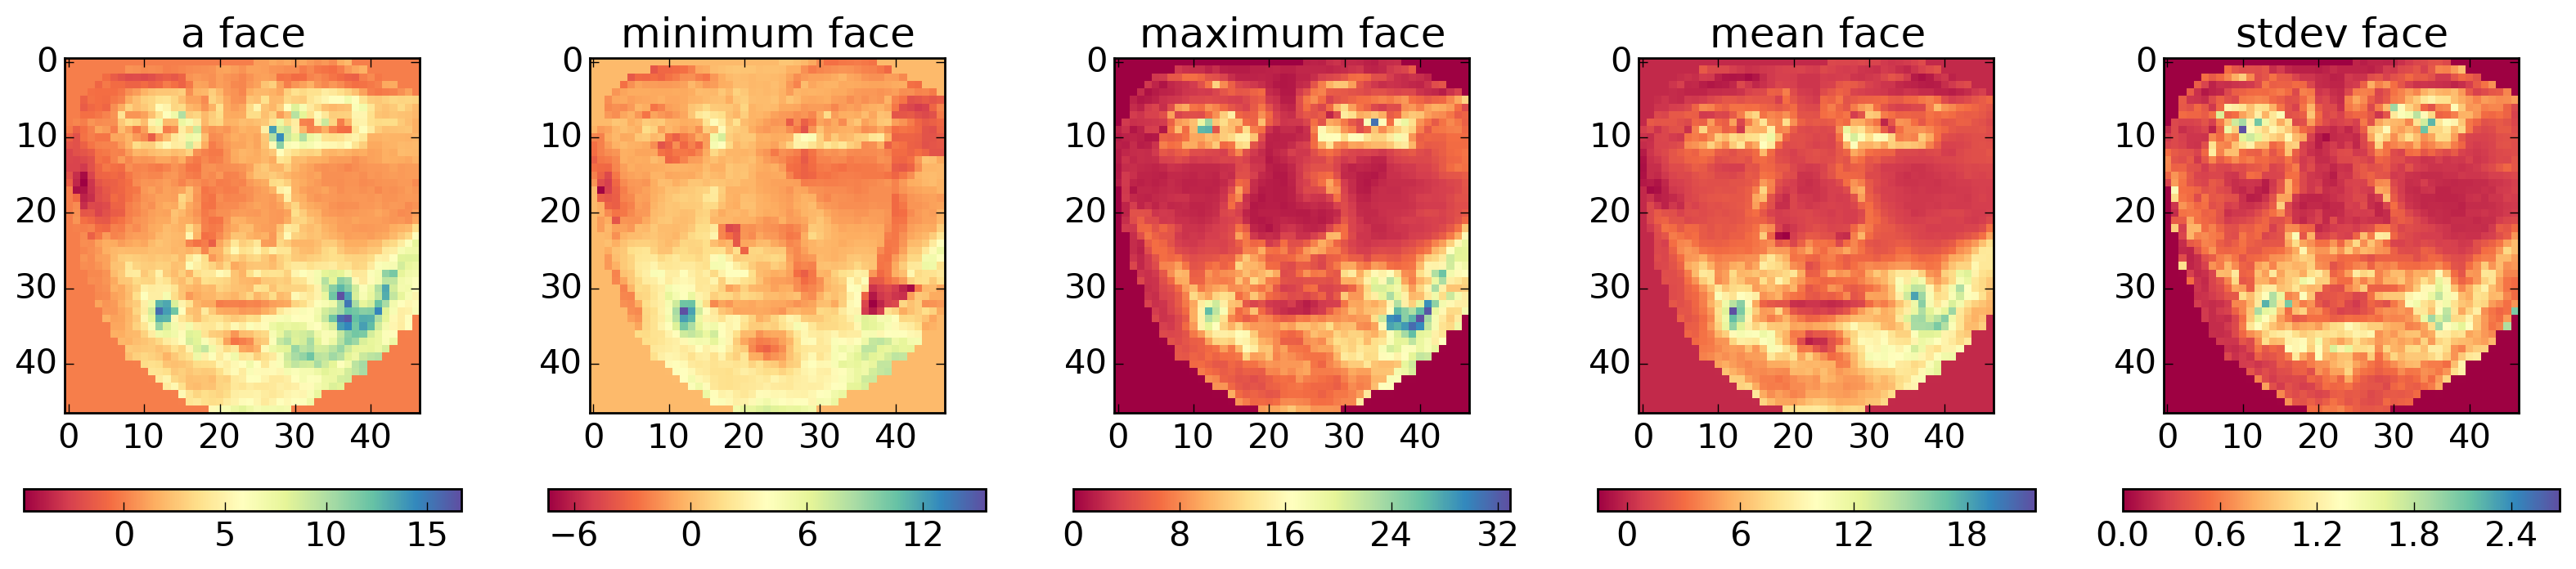

DEBUG:validation: not saving nothing for you mate


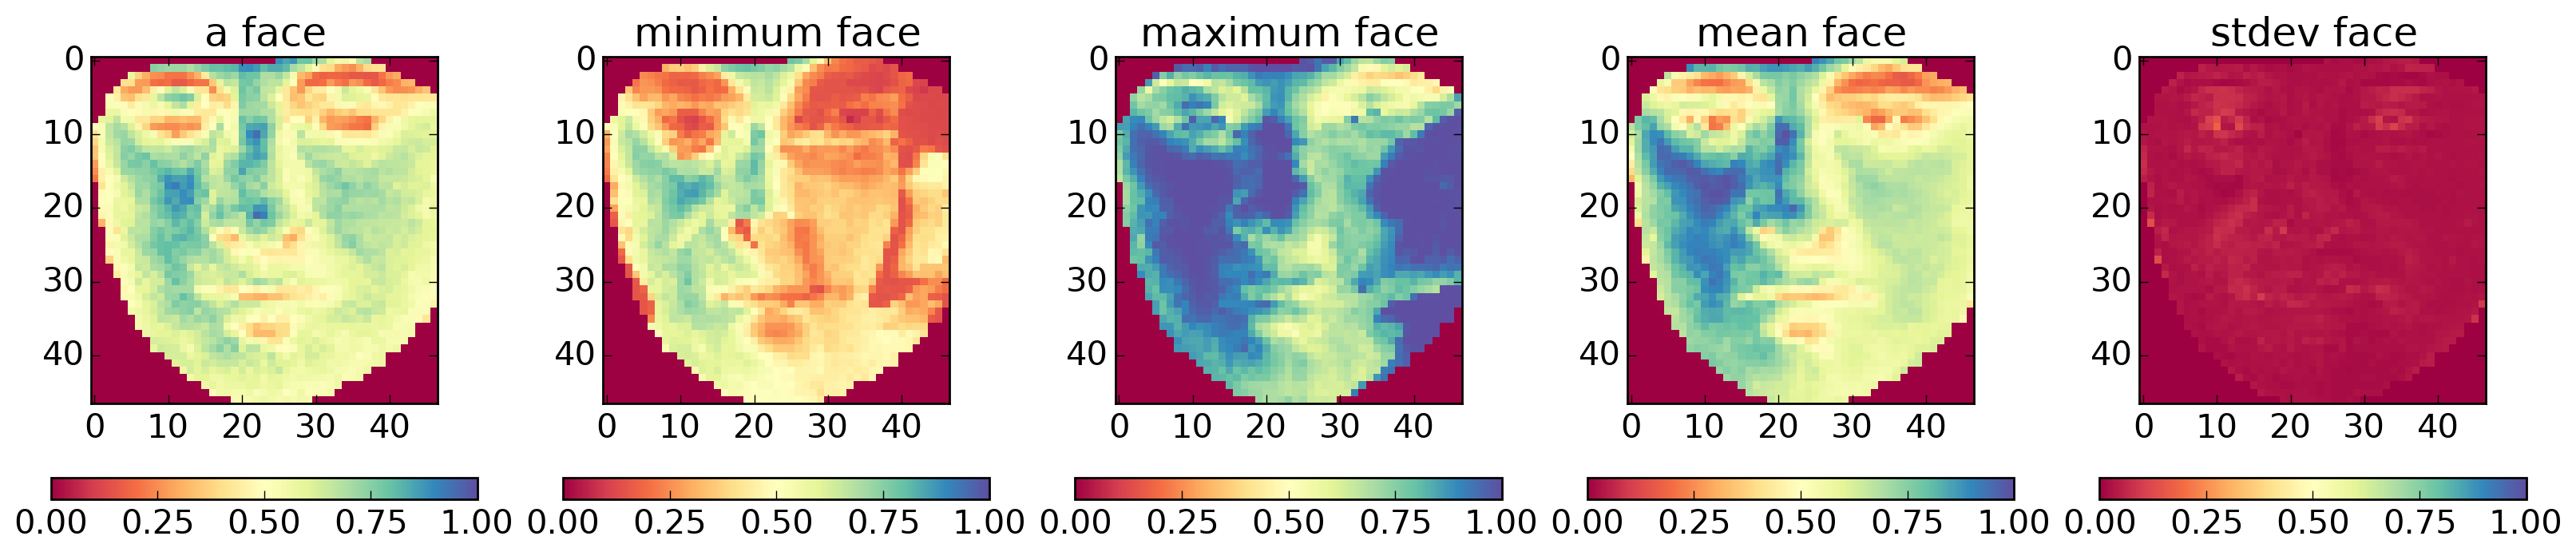

In [5]:
dataset_stats({'contrast':False,'face':True,'per_subject':False,'range':False})

Working....


Done.
{'range': False, 'per_subject': True, 'contrast': False, 'face': True}
save to /home/luka/Dropbox/msc_icl/541_Individual_Project/report_final/figures/faces_per_subject_face.pdf


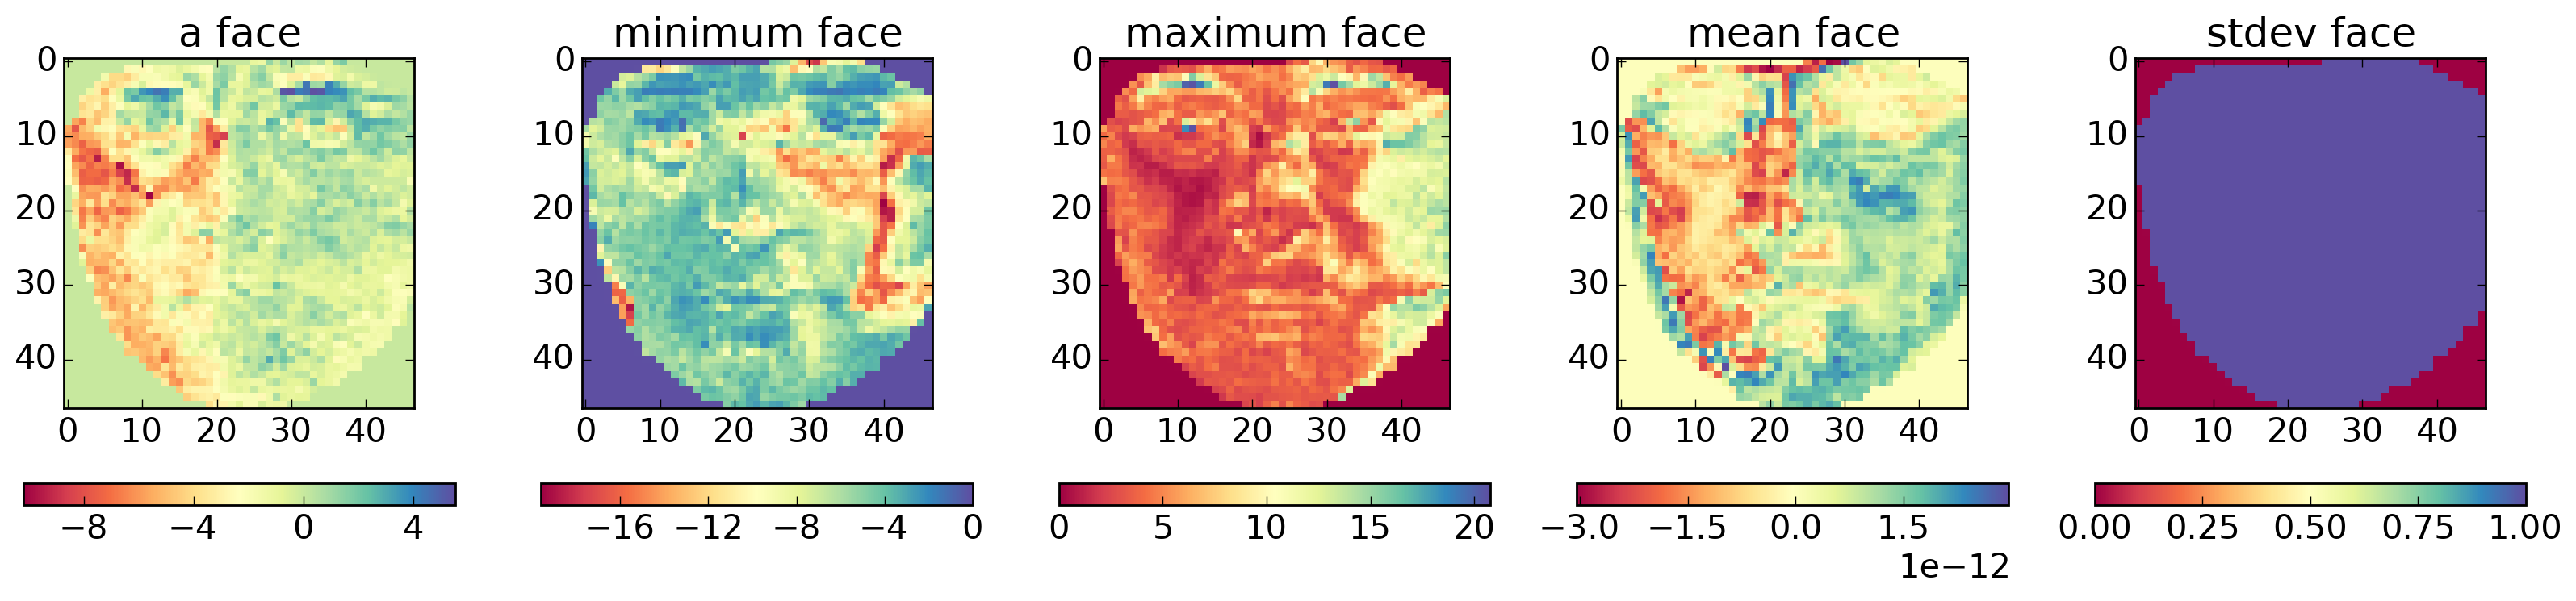

DEBUG:validation: not saving nothing for you mate


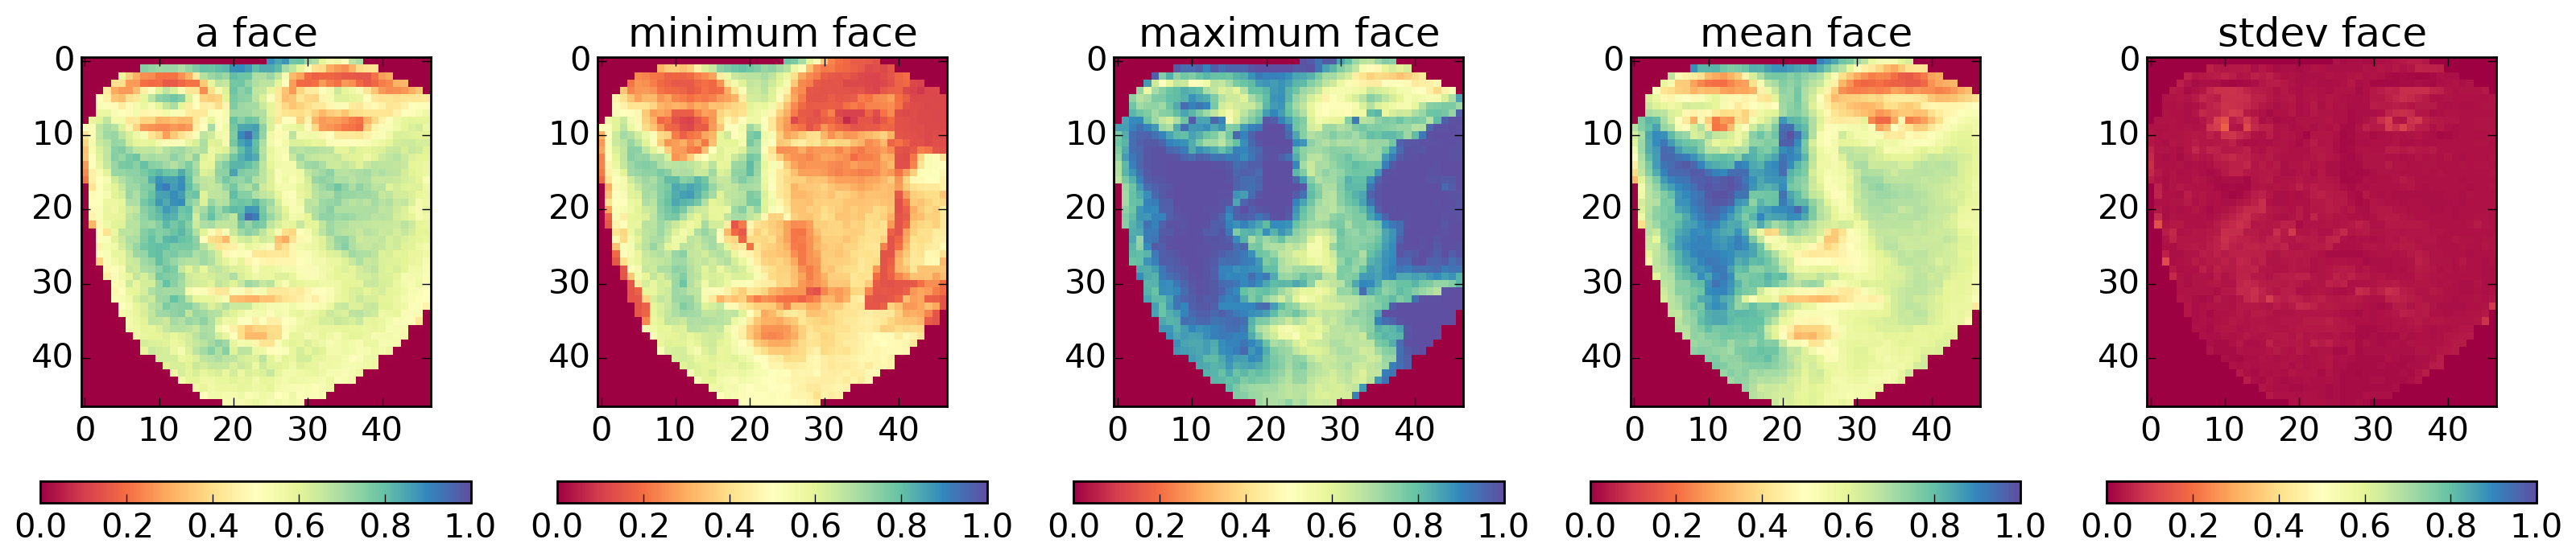

In [12]:
dataset_stats({'contrast':False,'face':True,'per_subject':True,'range':False})